In [53]:
import numpy as np
import matplotlib.pyplot as plt


In [54]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [55]:
x_train = np.array(
    [25, 600, 70, 150, 300, 110, 225]
)  # Salaries of people in thousand PKR
y_train = np.array(
    [1, 0, 1, 1, 0, 1, 0]
)  # Whether they can be considered for a financial aid program or not


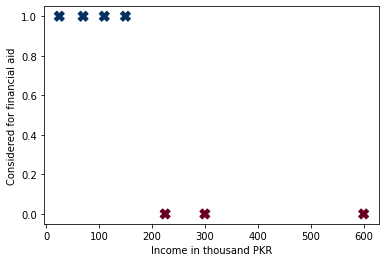

In [56]:
plt.xlabel("Income in thousand PKR")
plt.ylabel("Considered for financial aid")
plt.scatter(
    x_train, y_train, c=y_train, cmap="RdBu", marker="X", label="Training Data", s=100
)
plt.show()


In [57]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        cost += -y[i] * np.log(sigmoid(w * x[i] + b)) - (1 - y[i]) * (
            np.log(1 - sigmoid(w * x[i] + b))
        )
    cost = cost / m
    return cost


In [58]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        dj_dw += (sigmoid(w * x[i] + b) - y[i]) * x[i]
        dj_db += sigmoid(w * x[i] + b) - y[i]
    dj_dw /= m
    dj_db /= m
    return (dj_dw, dj_db)


In [59]:
def gradient_descent(x, y, w, b, lr):
    dj_dw, dj_db = compute_gradient(x, y, w, b)
    i = 0
    while True:
        prev_cost = compute_cost(x, y, w, b)
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - lr * dj_dw
        b = b - lr * dj_db
        new_cost = compute_cost(x, y, w, b)
        d_cost = prev_cost - new_cost
        i += 1
        if i % 10000 == 0:
            print(f"Cost After epoch-{i}: {new_cost}")
        if d_cost < 0.0000001:
            break
    return (w, b)


In [60]:
w = 0  # weight
b = 0  # bias


In [69]:
new_w, new_b = gradient_descent(x_train, y_train, w, b, 0.00015)
print(f"w:{new_w}, b:{new_b}")


Cost After epoch-10000: 0.5348633678791918
Cost After epoch-20000: 0.4792349533395756
Cost After epoch-30000: 0.43524373887398216
Cost After epoch-40000: 0.39975312956393216
Cost After epoch-50000: 0.3705573044379755
Cost After epoch-60000: 0.3461114280682575
Cost After epoch-70000: 0.32532348674423134
Cost After epoch-80000: 0.307408626399648
Cost After epoch-90000: 0.29179152850341367
Cost After epoch-100000: 0.27804188442160627
Cost After epoch-110000: 0.26583161847201014
Cost After epoch-120000: 0.2549061723593026
Cost After epoch-130000: 0.2450648926182391
Cost After epoch-140000: 0.2361473766926623
Cost After epoch-150000: 0.2280237828355107
Cost After epoch-160000: 0.22058782554201592
Cost After epoch-170000: 0.21375162489981422
Cost After epoch-180000: 0.20744185930011133
Cost After epoch-190000: 0.20159685034920707
Cost After epoch-200000: 0.1961643252477394
Cost After epoch-210000: 0.19109967880069406
Cost After epoch-220000: 0.18636460889936232
Cost After epoch-230000: 0.181

In [70]:
x_test = np.array([75, 5, 350, 253, 105, 95, 904, 14, 45])
y_test = np.array([1, 1, 0, 0, 1, 1, 0, 1, 1])
m = x_test.shape[0]
prediction_set = np.zeros(m, dtype=int)
for i in range(m):
    if sigmoid(new_w * x_test[i] + new_b) >= 0.5:
        prediction_set[i] = 1
    else:
        prediction_set[i] = 0
print(prediction_set)
print(y_test)


[1 1 0 0 1 1 0 1 1]
[1 1 0 0 1 1 0 1 1]
